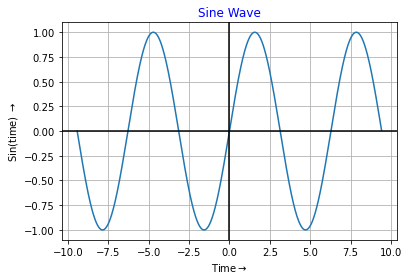

In [1]:
# Importing Required Libraries
import numpy as np
import matplotlib.pyplot as plt

# Generating time data using arange function from numpy
time = np.arange(-3*np.pi, 3*np.pi, 0.01)

# Finding amplitude at each time
amplitude = np.sin(time)

# Plotting time vs amplitude using plot function from pyplot
plt.plot(time, amplitude)

# Settng title for the plot in blue color
plt.title('Sine Wave', color='b')

# Setting x axis label for the plot
plt.xlabel('Time'+ r'$\rightarrow$')

# Setting y axis label for the plot
plt.ylabel('Sin(time) '+ r'$\rightarrow$')

# Showing grid
plt.grid()

# Highlighting axis at x=0 and y=0
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

# Finally displaying the plot
plt.show()

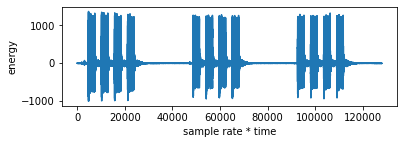

In [16]:
import wave
import numpy as np
import matplotlib.pyplot as plt

signal_wave = wave.open('alarm01.wav', 'r')
sample_rate = 128000
sig = np.frombuffer(signal_wave.readframes(sample_rate), dtype=np.int16)
data = sig[:]
left, right = data[0::2], data[1::2]
plt.figure(1)

plot_a = plt.subplot(211)
plot_a.plot(sig)
plot_a.set_xlabel('sample rate * time')
plot_a.set_ylabel('energy')


plt.show()

In [22]:
amplitude = data

In [23]:
sample = amplitude[::20]

In [24]:
Smin = sample.min()
Smax = sample.max()
sampleNormalized = (sample - Smin) / (Smax - Smin)


In [25]:
#sampleNormalized = sampleNormalized[:5]
leftShift = sampleNormalized[1:]
leftShift = np.append(leftShift,leftShift[-1]+(sampleNormalized[-1]-sampleNormalized[-2]))

rightShift = sampleNormalized[:sampleNormalized.size-1]
rightShift = np.insert(rightShift,0,rightShift[0]-(sampleNormalized[1]-sampleNormalized[0]))
#print(sampleNormalized.size, leftShift.size, rightShift.size)
        
    

In [26]:
#print(sampleNormalized)
#print(leftShift)
#print(rightShift)

In [27]:
slopes = leftShift - rightShift
#print(slopes)

In [28]:
simMat = np.zeros((sampleNormalized.size,sampleNormalized.size))
for i in range(0,sampleNormalized.size):
    simMat[i] = (1 - abs(sampleNormalized - sampleNormalized[i]))*(np.exp(-abs(slopes - slopes[i])))


In [29]:
#simMat

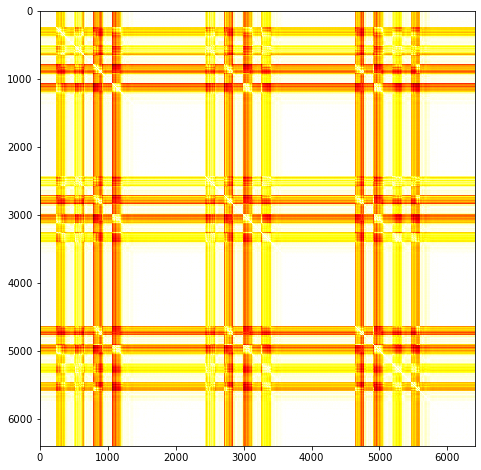

In [30]:
import matplotlib.pyplot as plt
import numpy as np

#a = np.random.random((16, 16))
plt.figure(figsize = (20,8))
plt.imshow(simMat, cmap='hot', interpolation='nearest')
plt.show()